In [57]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

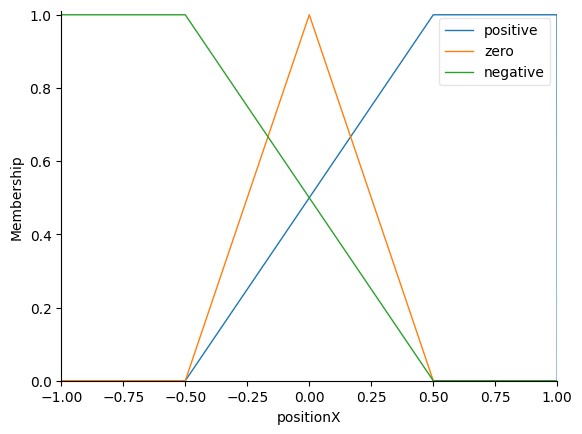

In [58]:
positionX = ctrl.Antecedent(np.arange(-1, 1.001, 0.001), 'positionX')

positionX['positive'] = fuzz.trapmf(positionX.universe, [-0.5, 0.5, 1, 1])
positionX['zero'] = fuzz.trimf(positionX.universe, [-0.5, 0, 0.5])
positionX['negative'] = fuzz.trapmf(positionX.universe, [-1, -1, -0.5, 0.5])

positionX.view()

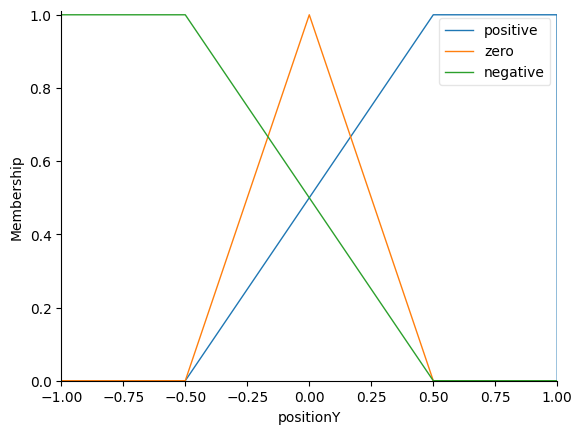

In [59]:
positionY = ctrl.Antecedent(np.arange(-1, 1.001, 0.001), 'positionY')

positionY['positive'] = fuzz.trapmf(positionY.universe, [-0.5, 0.5, 1, 1])
positionY['zero'] = fuzz.trimf(positionY.universe, [-0.5, 0, 0.5])
positionY['negative'] = fuzz.trapmf(positionY.universe, [-1, -1, -0.5, 0.5])

positionY.view()

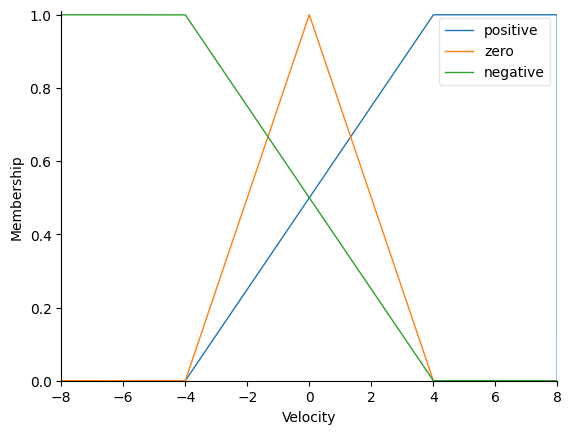

In [60]:
Velocity = ctrl.Antecedent(np.arange(-8, 8.001, 0.001), 'Velocity')

Velocity['positive'] = fuzz.trapmf(Velocity.universe, [-4, 4, 8, 8])
Velocity['zero'] = fuzz.trimf(Velocity.universe, [-4, 0, 4])
Velocity['negative'] = fuzz.trapmf(Velocity.universe, [-8, -8, -4, 4])

Velocity.view()

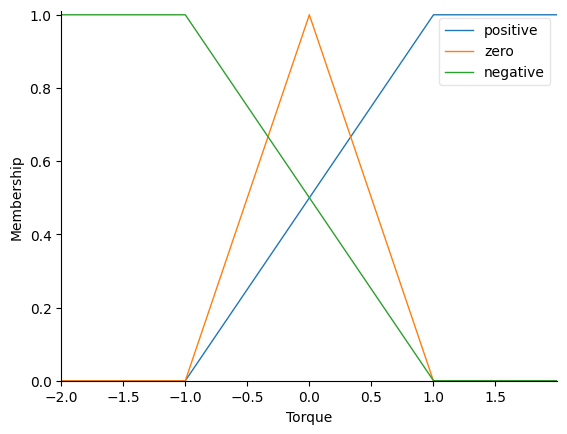

In [61]:
Torque = ctrl.Consequent(np.arange(-2, 2, 0.001), 'Torque')

Torque['positive'] = fuzz.trapmf(Torque.universe, [-1, 1, 2, 2])
Torque['zero'] = fuzz.trimf(Torque.universe, [-1, 0, 1])
Torque['negative'] = fuzz.trapmf(Torque.universe, [-2, -2, -1, 1])

Torque.view()

In [62]:
rule1 = ctrl.Rule(positionX['positive'] & positionY['positive'] & Velocity['positive'], Torque['negative'])
rule2 = ctrl.Rule(positionX['positive'] & positionY['positive'] & Velocity['zero'], Torque['negative'])
rule3 = ctrl.Rule(positionX['positive'] & positionY['positive'] & Velocity['negative'], Torque['negative'])
rule4 = ctrl.Rule(positionX['positive'] & positionY['zero'] & Velocity['positive'], Torque['negative'])
rule5 = ctrl.Rule(positionX['positive'] & positionY['zero'] & Velocity['zero'], Torque['negative'])
rule6 = ctrl.Rule(positionX['positive'] & positionY['zero'] & Velocity['negative'], Torque['negative'])
rule7 = ctrl.Rule(positionX['positive'] & positionY['negative'] & Velocity['positive'], Torque['negative'])
rule8 = ctrl.Rule(positionX['positive'] & positionY['negative'] & Velocity['zero'], Torque['negative'])
rule9 = ctrl.Rule(positionX['positive'] & positionY['negative'] & Velocity['negative'], Torque['negative'])

rule10 = ctrl.Rule(positionX['zero'] & positionY['positive'] & Velocity['positive'], Torque['negative'])
rule11 = ctrl.Rule(positionX['zero'] & positionY['positive'] & Velocity['zero'], Torque['negative'])
rule12 = ctrl.Rule(positionX['zero'] & positionY['positive'] & Velocity['negative'], Torque['negative'])
rule13 = ctrl.Rule(positionX['zero'] & positionY['zero'] & Velocity['positive'], Torque['zero'])
rule14 = ctrl.Rule(positionX['zero'] & positionY['zero'] & Velocity['zero'], Torque['zero'])
rule15 = ctrl.Rule(positionX['zero'] & positionY['zero'] & Velocity['negative'], Torque['zero'])
rule16 = ctrl.Rule(positionX['zero'] & positionY['negative'] & Velocity['positive'], Torque['positive'])
rule17 = ctrl.Rule(positionX['zero'] & positionY['negative'] & Velocity['zero'], Torque['positive'])
rule18 = ctrl.Rule(positionX['zero'] & positionY['negative'] & Velocity['negative'], Torque['positive'])

rule19 = ctrl.Rule(positionX['negative'] & positionY['positive'] & Velocity['positive'], Torque['negative'])
rule20 = ctrl.Rule(positionX['negative'] & positionY['positive'] & Velocity['zero'], Torque['negative'])
rule21 = ctrl.Rule(positionX['negative'] & positionY['positive'] & Velocity['negative'], Torque['negative'])
rule22 = ctrl.Rule(positionX['negative'] & positionY['zero'] & Velocity['positive'], Torque['negative'])
rule23 = ctrl.Rule(positionX['negative'] & positionY['zero'] & Velocity['zero'], Torque['negative'])
rule24 = ctrl.Rule(positionX['negative'] & positionY['zero'] & Velocity['negative'], Torque['negative'])
rule25 = ctrl.Rule(positionX['negative'] & positionY['negative'] & Velocity['positive'], Torque['positive'])
rule26 = ctrl.Rule(positionX['negative'] & positionY['negative'] & Velocity['zero'], Torque['positive'])
rule27 = ctrl.Rule(positionX['negative'] & positionY['negative'] & Velocity['negative'], Torque['positive'])

In [63]:
controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
                                  rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
                                  rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])
simulator = ctrl.ControlSystemSimulation(controller)

In [66]:
env = gym.make("Pendulum-v1", render_mode="human")
rewards=[]
observation, _ = env.reset()
for _ in range(500):
    simulator.input['positionX'] = observation[0]
    simulator.input['positionY'] = observation[1]
    simulator.input['Velocity'] = observation[2]
    simulator.compute()
    decision = simulator.output['Torque']

    observation, reward, terminated, truncated, info = env.step([decision])
    rewards.append(reward)
    # Make it easier
    if observation[0] >= 0.99 and abs(observation[2])<1.5:
        terminated=True
    
    env.render()
    
    if terminated:
        print(f'You Win in {_} iteration!')
        break

env.close()

You Win in 329 iteration!


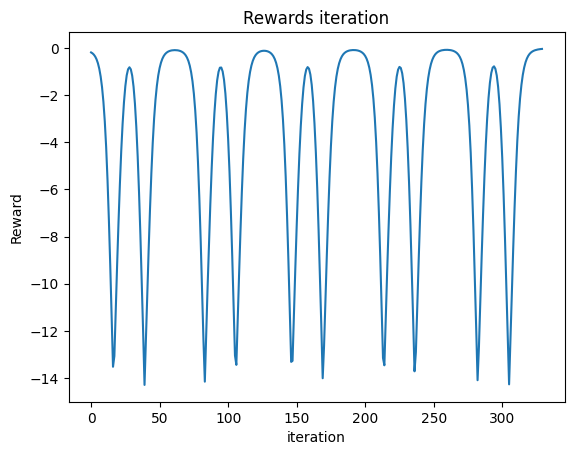

In [67]:
plt.plot(rewards)
plt.xlabel('iteration')
plt.ylabel('Reward')
plt.title('Rewards iteration')
plt.show()